# Canonical Correlation Analysis (CCA)
Example from https://stats.idre.ucla.edu/r/dae/canonical-correlation-analysis/

In [24]:
require(ggplot2)
require(GGally)
require(CCA)
require(CCP)

In [6]:
mm <- read.csv("https://stats.idre.ucla.edu/stat/data/mmreg.csv")
colnames(mm) <- c("Control", "Concept", "Motivation", "Read", "Write", "Math", 
    "Science", "Sex")
summary(mm)

    Control            Concept            Motivation          Read     
 Min.   :-2.23000   Min.   :-2.620000   Min.   :0.0000   Min.   :28.3  
 1st Qu.:-0.37250   1st Qu.:-0.300000   1st Qu.:0.3300   1st Qu.:44.2  
 Median : 0.21000   Median : 0.030000   Median :0.6700   Median :52.1  
 Mean   : 0.09653   Mean   : 0.004917   Mean   :0.6608   Mean   :51.9  
 3rd Qu.: 0.51000   3rd Qu.: 0.440000   3rd Qu.:1.0000   3rd Qu.:60.1  
 Max.   : 1.36000   Max.   : 1.190000   Max.   :1.0000   Max.   :76.0  
     Write            Math          Science           Sex       
 Min.   :25.50   Min.   :31.80   Min.   :26.00   Min.   :0.000  
 1st Qu.:44.30   1st Qu.:44.50   1st Qu.:44.40   1st Qu.:0.000  
 Median :54.10   Median :51.30   Median :52.60   Median :1.000  
 Mean   :52.38   Mean   :51.85   Mean   :51.76   Mean   :0.545  
 3rd Qu.:59.90   3rd Qu.:58.38   3rd Qu.:58.65   3rd Qu.:1.000  
 Max.   :67.10   Max.   :75.50   Max.   :74.20   Max.   :1.000  

In [7]:
xtabs(~Sex, data = mm)

Sex
  0   1 
273 327 

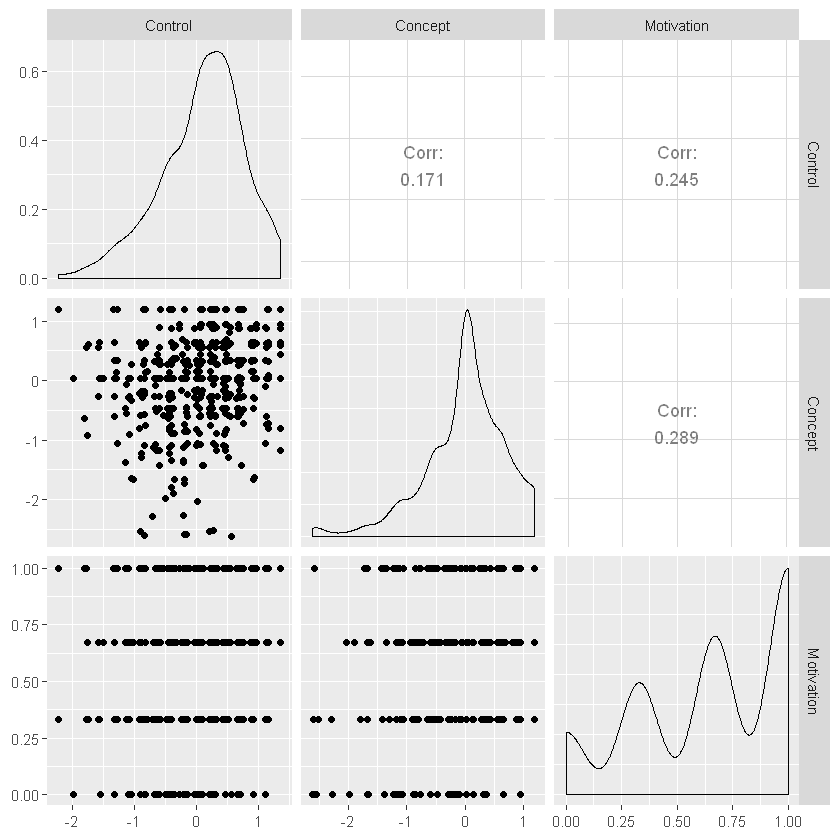

In [8]:
psych <- mm[, 1:3]
acad <- mm[, 4:8]

ggpairs(psych)

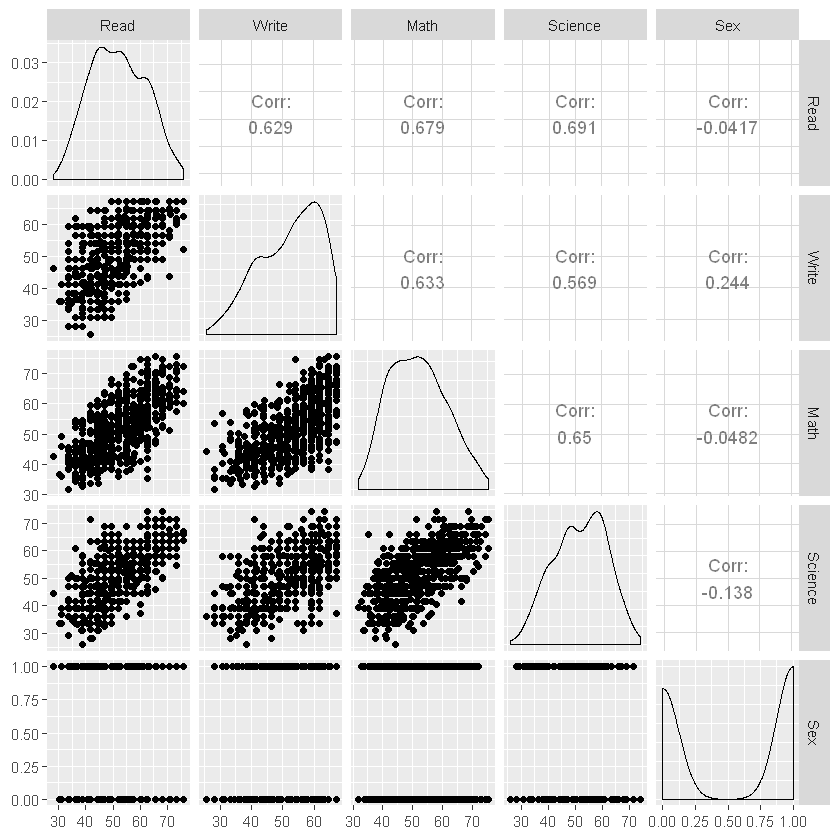

In [9]:
ggpairs(acad)

In [10]:
# correlations
matcor(psych, acad)

$Xcor
             Control   Concept Motivation
Control    1.0000000 0.1711878  0.2451323
Concept    0.1711878 1.0000000  0.2885707
Motivation 0.2451323 0.2885707  1.0000000

$Ycor
               Read     Write       Math    Science         Sex
Read     1.00000000 0.6285909  0.6792757  0.6906929 -0.04174278
Write    0.62859089 1.0000000  0.6326664  0.5691498  0.24433183
Math     0.67927568 0.6326664  1.0000000  0.6495261 -0.04821830
Science  0.69069291 0.5691498  0.6495261  1.0000000 -0.13818587
Sex     -0.04174278 0.2443318 -0.0482183 -0.1381859  1.00000000

$XYcor
             Control     Concept Motivation        Read      Write       Math
Control    1.0000000  0.17118778 0.24513227  0.37356505 0.35887684  0.3372690
Concept    0.1711878  1.00000000 0.28857075  0.06065584 0.01944856  0.0535977
Motivation 0.2451323  0.28857075 1.00000000  0.21060992 0.25424818  0.1950135
Read       0.3735650  0.06065584 0.21060992  1.00000000 0.62859089  0.6792757
Write      0.3588768  0.01944856 0.25424818  0.62859089 1.00000000  0.6326664
Math       0.3372690  0.05359770 0.19501347  0.67927568 0.63266640  1.0000000
Science    0.3246269  0.06982633 0.11566948  0.69069291 0.56914983  0.6495261
Sex        0.1134108 -0.12595132 0.09810277 -0.04174278 0.24433183 -0.0482183
               Science         Sex
Control     0.32462694  0.11341075
Concept     0.06982633 -0.12595132
Motivation  0.11566948  0.09810277
Read        0.69069291 -0.04174278
Write       0.56914983  0.24433183
Math        0.64952612 -0.04821830
Science     1.00000000 -0.13818587
Sex        -0.13818587  1.00000000

In [11]:
cc1 <- cc(psych, acad)

# display the canonical correlations
cc1$cor

[1] 0.4640861 0.1675092 0.1039911

In [12]:
# raw canonical coefficients
cc1[3:4]

Control,-1.2538339,-0.6214776,-0.6616896
Concept,0.3513499,-1.1876866,0.8267210
Motivation,-1.2624204,2.0272641,2.0002283
Read,-0.044620600,-0.004910024,0.021380576
Write,-0.035877112,0.042071478,0.091307329
Math,-0.023417185,0.004229478,0.009398182
Science,-0.005025152,-0.085162184,-0.109835014
Sex,-0.632119234,1.084642326,-1.794647036


In [13]:
# compute canonical loadings
cc2 <- comput(psych, acad, cc1)

# display canonical loadings
cc2[3:6]

Control,-0.90404631,-0.3896883,-0.1756227
Concept,-0.02084327,-0.7087386,0.7051632
Motivation,-0.56715106,0.3508882,0.7451289
Read,-0.3900402,-0.06010654,0.01407661
Write,-0.4067914,0.01086075,0.02647207
Math,-0.3545378,-0.04990916,0.01536585
Science,-0.3055607,-0.11336980,-0.02395489
Sex,-0.1689796,0.12645737,-0.05650916
Control,-0.419555307,-0.06527635,-0.01826320
Concept,-0.009673069,-0.11872021,0.07333073
Motivation,-0.263206910,0.05877699,0.07748681


In [18]:
# tests of canonical dimensions
rho <- cc1$cor
## Define number of observations, number of variables in first set, and number of variables in the second set.
n <- dim(psych)[1]
p <- length(psych)
q <- length(acad)

## Calculate p-values using the F-approximations of different test statistics:
p.asym(rho, n, p, q, tstat = "Wilks")

Wilks' Lambda, using F-approximation (Rao's F):
              stat    approx df1      df2     p.value
1 to 3:  0.7543611 11.715733  15 1634.653 0.000000000
2 to 3:  0.9614300  2.944459   8 1186.000 0.002905057
3 to 3:  0.9891858  2.164612   3  594.000 0.091092180


In [19]:
p.asym(rho, n, p, q, tstat = "Hotelling")

 Hotelling-Lawley Trace, using F-approximation:
               stat    approx df1  df2     p.value
1 to 3:  0.31429738 12.376333  15 1772 0.000000000
2 to 3:  0.03980175  2.948647   8 1778 0.002806614
3 to 3:  0.01093238  2.167041   3 1784 0.090013176


In [20]:
p.asym(rho, n, p, q, tstat = "Pillai")

 Pillai-Bartlett Trace, using F-approximation:
               stat    approx df1  df2     p.value
1 to 3:  0.25424936 11.000571  15 1782 0.000000000
2 to 3:  0.03887348  2.934093   8 1788 0.002932565
3 to 3:  0.01081416  2.163421   3 1794 0.090440474


In [21]:
p.asym(rho, n, p, q, tstat = "Roy")

 Roy's Largest Root, using F-approximation:
              stat   approx df1 df2 p.value
1 to 1:  0.2153759 32.61008   5 594       0

 F statistic for Roy's Greatest Root is an upper bound.


In [22]:
# standardized psych canonical coefficients diagonal matrix of psych sd's
s1 <- diag(sqrt(diag(cov(psych))))
s1 %*% cc1$xcoef

-0.8404196,-0.4165639,-0.4435172
0.2478818,-0.8379278,0.5832620
-0.4326685,0.6948029,0.6855370


In [23]:
# standardized acad canonical coefficients diagonal matrix of acad sd's
s2 <- diag(sqrt(diag(cov(acad))))
s2 %*% cc1$ycoef

-0.45080116,-0.04960589,0.21600760
-0.34895712,0.40920634,0.88809662
-0.22046662,0.03981942,0.08848141
-0.04877502,-0.82659938,-1.06607828
-0.31503962,0.54057096,-0.89442764


There is a lot of variation in the write-ups of canonical correlation analyses. The write-up below is fairly minimal, including only the tests of dimensionality and the standardized coefficients.

Table 1: Tests of Canonical Dimensions
            Canonical  Mult.
Dimension     Corr.      F    df1    df2      p
    1         0.46     11.72   15   1634.7  0.0000
    2         0.17      2.94    8   1186    0.0029
    3         0.10      2.16    3    594    0.0911

Table 2: Standardized Canonical Coefficients
                            Dimension
                           1         2
Psychological Variables
    locus of control    -0.84     -0.42
    self-concept         0.25     -0.84
    motivation          -0.43      0.69
Academic Variables plus Gender
    reading             -0.45     -0.05
    writing             -0.35      0.41
    math                -0.22      0.04
    science             -0.05     -0.83
    gender (female=1)   -0.32      0.54
Tests of dimensionality for the canonical correlation analysis, as shown in Table 1, indicate that two of the three canonical dimensions are statistically significant at the .05 level. Dimension 1 had a canonical correlation of 0.46 between the sets of variables, while for dimension 2 the canonical correlation was much lower at 0.17.

Table 2 presents the standardized canonical coefficients for the first two dimensions across both sets of variables. For the psychological variables, the first canonical dimension is most strongly influenced by locus of control (-.84) and for the second dimension self-concept (-.84) and motivation (.69). For the academic variables plus gender, the first dimension was comprised of reading (-.45), writing (-.35) and gender (-.32). For the second dimension writing (.41), science (-.83) and gender (.54) were the dominating variables.